# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [8]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

image_path = '..\data\TarantulaNebula.jpg'


A = imread(image_path) #matrix A that now contains the image

In [3]:
A.shape

(567, 630, 3)

Visualize the picture

(-0.5, 629.5, 566.5, -0.5)

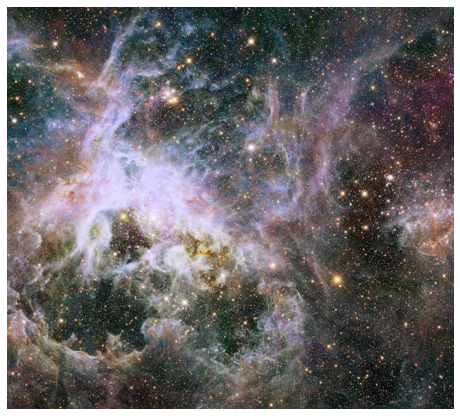

In [4]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

(567, 630)

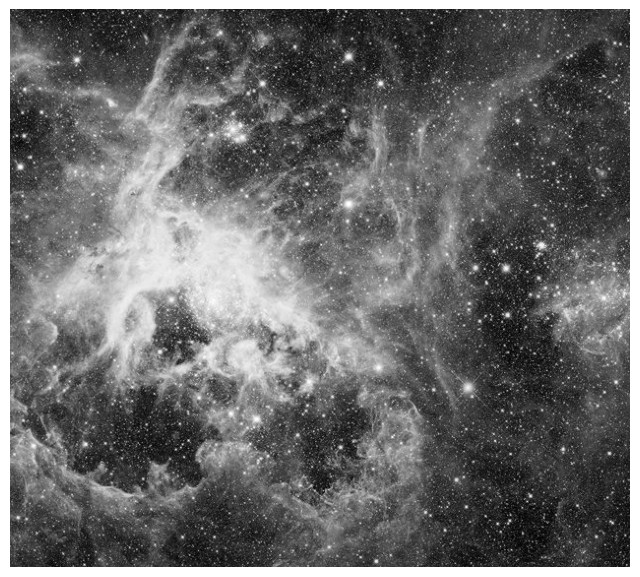

In [12]:
X = np.mean(A, axis = 2)
img = plt.imshow(X)
plt.axis('off')
img.set_cmap('gray') #because matplotlib is using a color map that map values from zero to 10% to 100%
#we need to change the color map, just for visualization purposes
'''
in the third axis you have the intensity of red, green and blue
If you want to have the overall intensity, what can we do?
A linear combination. In particular, typically the average or the sum. OK. For instance, we can do the 
average.
'''
X.shape

What is the picture size?

In [6]:
X.shape

(567, 630)

Perform the SVD decomposition

In [7]:
U, s, VT = np.linalg.svd(X, full_matrices = False)
U.shape, s.shape, VT.shape

'''
np.linalg.svd(matrix. full_matrices = false) for usage of the economic/thin/reduced svd
the sigma we remember that is only the diagonal for economic reason (not useful to save the zeros)
'''

((567, 567), (567,), (567, 630))

Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'explained variance')

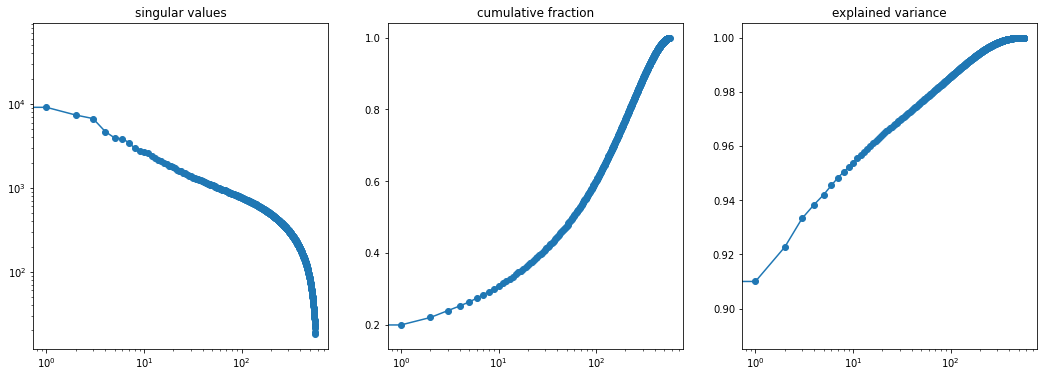

In [8]:
plt.plot(s, 'o-') #plot a circle for each point
plt.semilogy(s, 'o-') #to bettter visualize it is useful to use a semi-logarithmic scale (or log scale)

fig, axs = plt.subplots(1,3, figsize = (18,6))
axs[0].loglog(s, 'o-') #loglog scale to see immediately what happens at the beginning
axs[0].set_title('singular values')

axs[1].semilogx(np.cumsum(s) / np.sum(s), 'o-') #it goes from zero to one
#the cumsum function is the cumulative sum
axs[1].set_title('cumulative fraction')

axs[2].semilogx(np.cumsum(s**2) / np.sum(s**2), 'o-')
axs[2].set_title('explained variance') #the same with the squares
'''
we can see that with the first singular value we can caputre more than 90% of the variance
and with first ten singular values more or less 95% of the variance so there is a good hope
that we will be able to actually reduce in an effective way the size of this picture
'''

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

In [1]:
# Numero di valori singolari da considerare
idxs = [1, 5, 10, 50, 100, 500]

# Creazione di una griglia di subplot con 2 righe e 3 colonne
# e specifica delle dimensioni della figura
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Appiattimento della matrice di assi per semplificare l'iterazione
axs = axs.flatten() #perché era un array di 2 dimensioni e noi si trasforma in una dimensione

# Iterazione su ogni indice specificato
for i in range(len(idxs)):
    k = idxs[i]  # Numero di componenti da considerare
    # Ricostruzione dell'immagine utilizzando solo i primi k valori singolari
    Xk = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]

    #np.diag è una funzione numpy che comunemente viene utilizzata per creare matrice diagonale
    #da un vettore o estrarre la diagonale principale da una matrice
    
    # Visualizzazione dell'immagine ricostruita
    axs[i].imshow(Xk)
    axs[i].set_title('k = %d' % k)  # Impostazione del titolo del subplot
    axs[i].axis('off')  # Rimozione degli assi
    
    plt.set_cmap('gray')  # Impostazione della mappa dei colori in scala di grigi

# Visualizzazione della figura
plt.show()

'''
In numpy ":" operator è usato per selezionare intervalli di elementi lungo una dimensione specifica dell'array
U[:, :k] in questo caso il primo operatore seleziona tutte le righe della matrice u 
mentre :k seleziona le prime k colonne della matrice u.
Potevamo scrivere anche U[:, 0:k] dove per le colonne era sempre da 0 a k ma con la notazione più grande

'''

NameError: name 'plt' is not defined

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

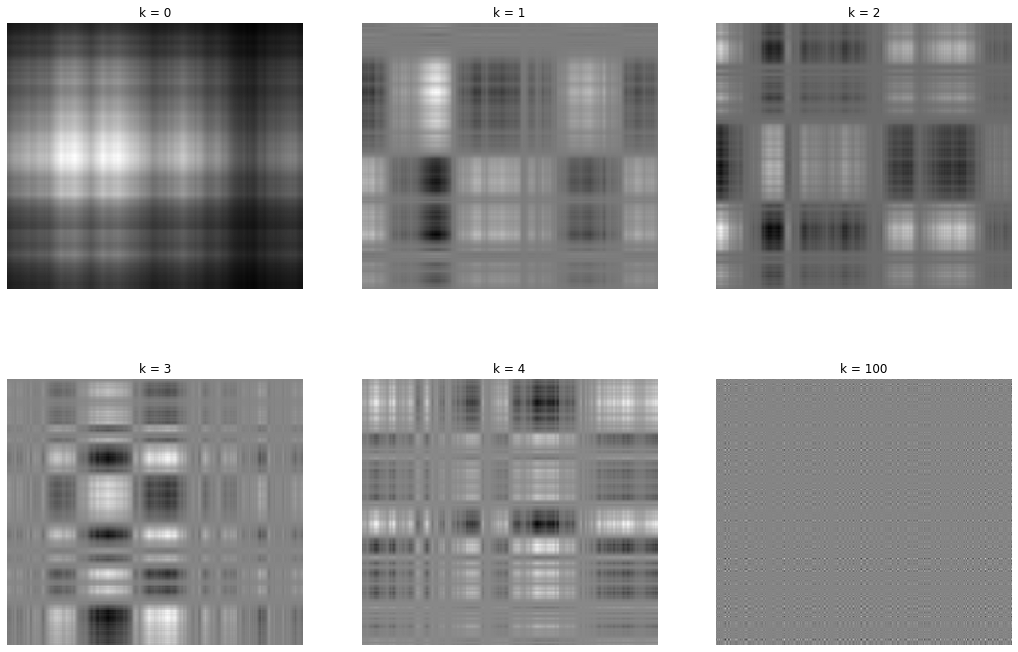

In [10]:
fig, axs = plt.subplots(2,3,figsize = (18,12))
axs = axs.flatten()
idxs = [0,1,2,3,4,100]
for i in range(len(idxs)):
  k = idxs[i]
  Xk = np.outer(s[k]*U[:,k], VT[k,:])
  axs[i].imshow(Xk)
  axs[i].set_title('k = %d' % k)
  axs[i].axis('off')
  plt.set_cmap('gray')

## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.

In [11]:
def randomized_SVD(A, k):
  m, n = A.shape
  P = np.random.randn(n, k) #generates random numbers according to the standard normal distribution
  '''
  you want to extract the most prominent features that are in the columns
  '''
  Z = A @ P
  Q, R = np.linalg.qr(Z)
  Y = Q.T @ A # QR factorization
  Uy, sy, VTy = np.linalg.svd(Y, full_matrices = False)
  U = Q @ Uy
  return U, sy, VTy

'''
rsvd is a quick way of computing A reduced version of the SVD when you don't want all 
the singular values in the associated singular values, but just those up to some rank K
'''

Set $k=100$ and compute the randomized SVD of the picture used above.

In [12]:
k = 100
U_rand, s_rand, VT_rand = randomized_SVD(X, k)

Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.

Text(0.5, 1.0, 'explained variance')

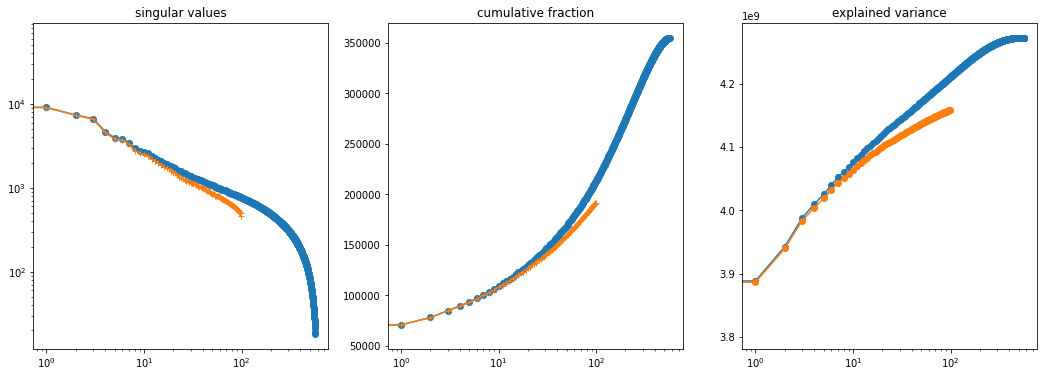

In [13]:
fig, axs = plt.subplots(1,3, figsize = (18,6))
axs[0].loglog(s, 'o-')
axs[0].loglog(s_rand, '+-')
axs[0].set_title('singular values')

axs[1].semilogx(np.cumsum(s), 'o-')
axs[1].semilogx(np.cumsum(s_rand), '+-')
axs[1].set_title('cumulative fraction')

axs[2].semilogx(np.cumsum(s**2) , 'o-')
axs[2].semilogx(np.cumsum(s_rand**2) , 'o-')
axs[2].set_title('explained variance')

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.

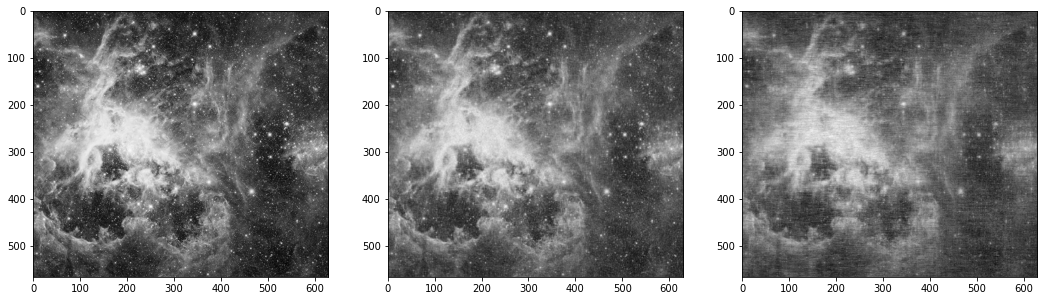

In [14]:
fig, axs = plt.subplots(1,3,figsize = (18, 6))


axs[0].imshow(X)
axs[1].imshow(U[:,:k] @ np.diag(s[:k]) @ VT[:k,:])
axs[2].imshow(U_rand @ np.diag(s_rand) @ VT_rand)